In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
import numpy as np
from scipy import stats

In [2]:
def getData(file):
    f=open(file)
    arr = []
    lines=list(map(lambda x: x.strip(), f.readlines()))
    for line in lines:
        s = line.split(" ")
        arr.append((s[0], s[1], float(s[2])))
    return arr
def Average(lst):
    return sum(map(lambda a: a[2], lst)) / len(lst)
def tTest(a, b):
    t, p = stats.ttest_ind(a,b)
    print("t = " + "{:.5f}".format(t) + "\tp = " + "{:.5e}".format(p)) # low is good! i.e. lt 0.05 is acceptable

In [3]:
rnd_3d = getData("rnd_3d.scores")
rnd_2d = getData("rnd_2d.scores")
rnd_1d = getData("rnd_1d.scores")
rnd_0d = getData("rnd_0d.scores")
low_c = getData("low_c_bls.scores")
high_c = getData("high_c_bls.scores")

In [4]:
print(Average(rnd_3d), Average(rnd_2d), Average(rnd_1d), Average(rnd_0d), Average(low_c), Average(high_c))

0.5753818525519859 0.5774151300236402 0.5836226950354608 0.5785054373522456 0.5780454119850182 0.6248453169347196


In [5]:
print("low c vs random")
tTest(list(map(lambda x: x[2], low_c)), list(map(lambda x: x[2], rnd_3d)))
tTest(list(map(lambda x: x[2], low_c)), list(map(lambda x: x[2], rnd_2d)))
tTest(list(map(lambda x: x[2], low_c)), list(map(lambda x: x[2], rnd_1d)))
tTest(list(map(lambda x: x[2], low_c)), list(map(lambda x: x[2], rnd_0d)))
print("high c vs random")
tTest(list(map(lambda x: x[2], high_c)), list(map(lambda x: x[2], rnd_3d)))
tTest(list(map(lambda x: x[2], high_c)), list(map(lambda x: x[2], rnd_2d)))
tTest(list(map(lambda x: x[2], high_c)), list(map(lambda x: x[2], rnd_1d)))
tTest(list(map(lambda x: x[2], high_c)), list(map(lambda x: x[2], rnd_0d)))

low c vs random
t = 0.95377	p = 3.40254e-01
t = 0.22471	p = 8.22216e-01
t = -1.96068	p = 4.99817e-02
t = -0.16174	p = 8.71516e-01
high c vs random
t = 14.15134	p = 1.86848e-44
t = 13.53030	p = 7.26628e-41
t = 11.65255	p = 6.58002e-31
t = 13.10021	p = 1.82636e-38


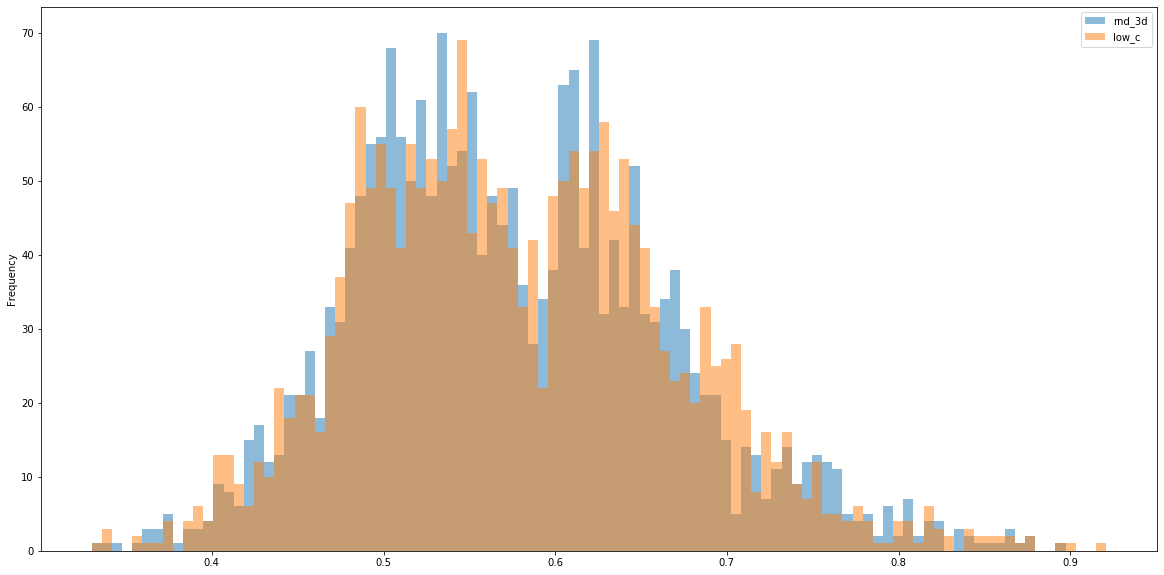

In [8]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

size=min(len(rnd_3d), len(rnd_2d), len(rnd_1d), len(rnd_0d), len(low_c)) # needs to be same size for df plots
df = pd.DataFrame({
    'rnd_3d': list(map(lambda x: x[2], rnd_3d))[-size:],
#     'rnd_2d': list(map(lambda x: x[2], rnd_2d))[-size:],
#     'rnd_1d': list(map(lambda x: x[2], rnd_1d))[-size:],
#     'rnd_0d': list(map(lambda x: x[2], rnd_0d))[-size:],
    'low_c':  list(map(lambda x: x[2], low_c))[-size:], # basically sample size  
})
df.plot.hist(bins = 100, alpha=0.5)

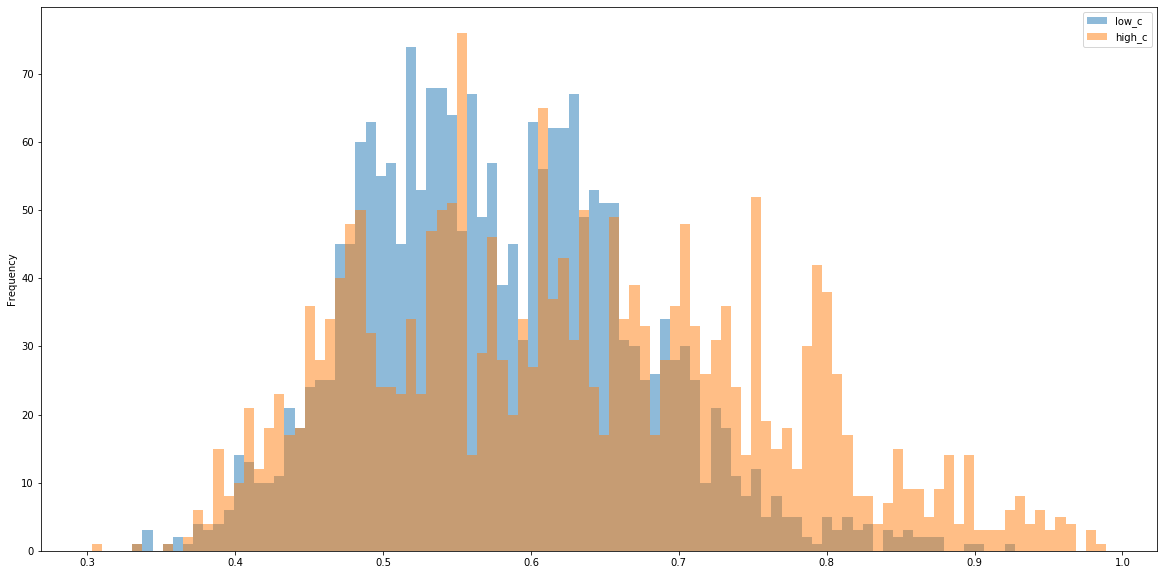

In [9]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

size=min(len(low_c), len(high_c)) # needs to be same size for df plots
df = pd.DataFrame({
    'low_c':  list(map(lambda x: x[2], low_c))[-size:], # basically sample size  
    'high_c': list(map(lambda x: x[2], high_c))[-size:],
})
df.plot.hist(bins = 100, alpha=0.5)

In [14]:
from Bio.motifs import transfac 
jaspar_motifs = transfac.read(open("../jaspar.txt"))
jaspar_motifs_dict = { jaspar_motifs[i]["AC"] : jaspar_motifs[i].degenerate_consensus for i in range(0, len(jaspar_motifs) ) }

In [15]:
top = 10
high_c_top = sorted(high_c, key = lambda x: x[2])[-top:]
high_c_bls_motifs = transfac.read(open("high_c_bls_fixed.txt"))
high_c_bls_motifs_dict = { high_c_bls_motifs[i]["AC"] : high_c_bls_motifs[i].degenerate_consensus for i in range(0, len(high_c_bls_motifs) ) }
print("highest high c")
for el in list(map(lambda x: (high_c_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), high_c_top)):
    print(el)
high_c_top = sorted(high_c, key = lambda x: x[2])[0:top]
high_c_bls_motifs = transfac.read(open("high_c_bls_fixed.txt"))
high_c_bls_motifs_dict = { high_c_bls_motifs[i]["AC"] : high_c_bls_motifs[i].degenerate_consensus for i in range(0, len(high_c_bls_motifs) ) }
print("lowest high c")
for el in list(map(lambda x: (high_c_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), high_c_top)):
    print(el)
print("jaspar motifs covered:", len(set(map(lambda x: x[1], high_c))))

highest high c
(Seq('HCGCCGCC'), Seq('SCGCCGCC'), 0.96)
(Seq('CGYCGCCR'), Seq('CGSCGCCR'), 0.961)
(Seq('YCGCCGCC'), Seq('SCGCCGCC'), 0.963)
(Seq('BGGCGGCG'), Seq('CGSCGCCR'), 0.963)
(Seq('CGCCGCCD'), Seq('CGSCGCCR'), 0.963)
(Seq('KCGCCGCC'), Seq('GCGCCGCC'), 0.965)
(Seq('GGCGGCGB'), Seq('GCGCCGCC'), 0.976)
(Seq('CGCCGCCR'), Seq('CGSCGCCR'), 0.98)
(Seq('BCGCCGCC'), Seq('SCGCCGCC'), 0.981)
(Seq('SCGCCGCC'), Seq('GCGCCGCC'), 0.989)
lowest high c
(Seq('GCAGYAGY'), Seq('NACTGACAGT'), 0.303)
(Seq('AGCAGBAG'), Seq('NNNGCAGACATNN'), 0.335)
(Seq('AGCWGSAG'), Seq('NNNGCAGACATNN'), 0.357)
(Seq('WGCTGCAA'), Seq('CTGCATGCN'), 0.371)
(Seq('TKCTGCAA'), Seq('CTGCATGCN'), 0.371)
(Seq('AGCWGCAA'), Seq('NNGCAACAKAWN'), 0.372)
(Seq('CTGCAGCD'), Seq('NNNGCAGACATNN'), 0.372)
(Seq('CTGCARAA'), Seq('NNNGCAGACATNN'), 0.373)
(Seq('AGCAGCWR'), Seq('GGTWGGTR'), 0.374)
(Seq('AGCTGCAG'), Seq('TGCAAGTKGNN'), 0.375)
jaspar motifs covered: 86


In [16]:
low_c_top = sorted(low_c, key = lambda x: x[2])[-top:]
low_c_bls_motifs = transfac.read(open("low_c_bls_fixed.txt"))
low_c_bls_motifs_dict = { low_c_bls_motifs[i]["AC"] : low_c_bls_motifs[i].degenerate_consensus for i in range(0, len(low_c_bls_motifs) ) }
print("highest low c")
for el in list(map(lambda x: (low_c_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), low_c_top)):
    print(el)
low_c_top = sorted(low_c, key = lambda x: x[2])[0:top]
low_c_bls_motifs = transfac.read(open("low_c_bls_fixed.txt"))
low_c_bls_motifs_dict = { low_c_bls_motifs[i]["AC"] : low_c_bls_motifs[i].degenerate_consensus for i in range(0, len(low_c_bls_motifs) ) }
print("lowest low c")
for el in list(map(lambda x: (low_c_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), low_c_top)):
    print(el)
print("jaspar motifs covered:", len(set(map(lambda x: x[1], low_c))))

highest low c
(Seq('GSHGGCGB'), Seq('GCGCCGCC'), 0.857)
(Seq('YGTAYGSA'), Seq('TCCGTACN'), 0.86)
(Seq('WSTCAACK'), Seq('AGTCAACG'), 0.865)
(Seq('CCSTACSK'), Seq('CCGTACGG'), 0.867)
(Seq('GGGNYCAY'), Seq('GGGACCAC'), 0.869)
(Seq('AMCTAHCS'), Seq('ACCTACCG'), 0.874)
(Seq('GYASGTGB'), Seq('NCACGTGC'), 0.874)
(Seq('RKGTCAAM'), Seq('NRGTCAAC'), 0.896)
(Seq('SCACNTGN'), Seq('NCACGTGN'), 0.902)
(Seq('HCACGKGY'), Seq('GCACGTGK'), 0.921)
lowest low c
(Seq('WGGAGTDB'), Seq('NNCACCTGRNNN'), 0.333)
(Seq('ACTASWCV'), Seq('ACACGTGT'), 0.339)
(Seq('CADTCCVB'), Seq('NNNTGTACGGAN'), 0.34)
(Seq('CTCCDSGA'), Seq('TCACCA'), 0.34)
(Seq('CYATRGMC'), Seq('NNTAACTATGGTTA'), 0.356)
(Seq('CBATVCCN'), Seq('NGGTAGGTANN'), 0.359)
(Seq('ABCCBGGR'), Seq('GTGGNCCCNN'), 0.362)
(Seq('GAWGGARN'), Seq('RGAMGC'), 0.37)
(Seq('DCTMCVAA'), Seq('GKTAGGTR'), 0.372)
(Seq('MABHCTCC'), Seq('NGRCGGCGGMGRNNN'), 0.372)
jaspar motifs covered: 236


In [17]:
rnd_3d_top = sorted(rnd_3d, key = lambda x: x[2])[-top:]
rnd_3d_bls_motifs = transfac.read(open("rnd_3d_fixed.txt"))
rnd_3d_bls_motifs_dict = { rnd_3d_bls_motifs[i]["AC"] : rnd_3d_bls_motifs[i].degenerate_consensus for i in range(0, len(rnd_3d_bls_motifs) ) }
for el in list(map(lambda x: (rnd_3d_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), rnd_3d_top)):
    print(el)
    
print("jaspar motifs covered:", len(set(map(lambda x: x[1], rnd_3d))))

(Seq('CGNTWNGT'), Seq('ACCTACCG'), 0.848)
(Seq('CATCATVG'), Seq('CATCATY'), 0.854)
(Seq('TCAMGTGH'), Seq('TCACGTGS'), 0.859)
(Seq('AGACGTRG'), Seq('ASACGTGG'), 0.862)
(Seq('KAAYDTTC'), Seq('GAATATTC'), 0.862)
(Seq('YYSCCGCC'), Seq('SCGCCGCC'), 0.867)
(Seq('CCACBTGA'), Seq('TCACGTGS'), 0.869)
(Seq('NGGNCGGK'), Seq('RCCGACCA'), 0.875)
(Seq('GCCGRCAA'), Seq('RCCGACAN'), 0.876)
(Seq('BMKCCGCC'), Seq('SCGCCGCC'), 0.896)
jaspar motifs covered: 248


In [18]:
rnd_0d_top = sorted(rnd_0d, key = lambda x: x[2])[-top:]
rnd_0d_bls_motifs = transfac.read(open("rnd_0d_fixed.txt"))
rnd_0d_bls_motifs_dict = { rnd_0d_bls_motifs[i]["AC"] : rnd_0d_bls_motifs[i].degenerate_consensus for i in range(0, len(rnd_0d_bls_motifs) ) }
for el in list(map(lambda x: (rnd_0d_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), rnd_0d_top)):
    print(el)
    
print("jaspar motifs covered:", len(set(map(lambda x: x[1], rnd_0d))))

(Seq('GACACGTG'), Seq('CACGTGSC'), 0.879)
(Seq('TACCGACA'), Seq('TGTCGGTG'), 0.898)
(Seq('GCGAATCT'), Seq('AGATWCGS'), 0.899)
(Seq('GATCTGAT'), Seq('ATCSGATC'), 0.905)
(Seq('GGTAGGTG'), Seq('GGTWGGTR'), 0.922)
(Seq('GGTAGGTG'), Seq('GGTWGGTR'), 0.922)
(Seq('TACCTACC'), Seq('GKTAGGTR'), 0.937)
(Seq('ATGTCGGT'), Seq('ATGTCGGY'), 0.957)
(Seq('AATGATTG'), Seq('AATGATTG'), 0.958)
(Seq('GGCGGCGC'), Seq('GCGCCGCC'), 0.985)
jaspar motifs covered: 238


In [19]:
rnd_1d_top = sorted(rnd_1d, key = lambda x: x[2])[-top:]
rnd_1d_bls_motifs = transfac.read(open("rnd_1d_fixed.txt"))
rnd_1d_bls_motifs_dict = { rnd_1d_bls_motifs[i]["AC"] : rnd_1d_bls_motifs[i].degenerate_consensus for i in range(0, len(rnd_1d_bls_motifs) ) }
for el in list(map(lambda x: (rnd_1d_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), rnd_1d_top)):
    print(el)
    
print("jaspar motifs covered:", len(set(map(lambda x: x[1], rnd_1d))))

(Seq('SGCCCCAC'), Seq('GGSCCCAC'), 0.895)
(Seq('GWTCCGAT'), Seq('ATCSGATC'), 0.912)
(Seq('RATTATTA'), Seq('TAATMATT'), 0.919)
(Seq('HGGCGGCT'), Seq('MGCCGCCA'), 0.926)
(Seq('GNTAGGTA'), Seq('GKTAGGTR'), 0.936)
(Seq('WTGTCGGC'), Seq('ATGTCGGC'), 0.942)
(Seq('RCACGTAA'), Seq('ACACGTAA'), 0.951)
(Seq('BGTTGACC'), Seq('CGTTGACC'), 0.954)
(Seq('BGGTCAAC'), Seq('YGGTCAAC'), 0.962)
(Seq('GNTGACGT'), Seq('ACGTCAKC'), 0.972)
jaspar motifs covered: 236


In [20]:
rnd_2d_top = sorted(rnd_2d, key = lambda x: x[2])[-top:]
rnd_2d_bls_motifs = transfac.read(open("rnd_2d_fixed.txt"))
rnd_2d_bls_motifs_dict = { rnd_2d_bls_motifs[i]["AC"] : rnd_2d_bls_motifs[i].degenerate_consensus for i in range(0, len(rnd_2d_bls_motifs) ) }
for el in list(map(lambda x: (rnd_2d_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), rnd_2d_top)):
    print(el)
    
print("jaspar motifs covered:", len(set(map(lambda x: x[1], rnd_2d))))

(Seq('CGNCGHCG'), Seq('CGSCGCCR'), 0.848)
(Seq('MDGGTCCC'), Seq('GGGACCAC'), 0.855)
(Seq('YGYCGGAA'), Seq('TGTCGGAA'), 0.859)
(Seq('GDTADGTA'), Seq('GKTAGGTR'), 0.863)
(Seq('RATMATTA'), Seq('TAATMATT'), 0.866)
(Seq('MSGCGGCG'), Seq('CGSCGCCR'), 0.879)
(Seq('BYATATTC'), Seq('NNWTATTC'), 0.883)
(Seq('KAYGACGT'), Seq('ACGTCAKC'), 0.883)
(Seq('BGSCGGCC'), Seq('SGCCGCCN'), 0.883)
(Seq('MRCCGCCG'), Seq('MGCCGCCN'), 0.899)
jaspar motifs covered: 245


In [23]:
for motif in sorted(set(map(lambda x: jaspar_motifs_dict[x[1]], high_c))):
    print(motif)

AAAGC
AAAGCN
AATGATTG
ACACGTGKCANN
ACACGTGT
ACCTACCG
ACGTCAKC
AGATATTTTNNN
ASACGTGG
ATGTCGGC
CACCGACA
CACGTGSC
CACTNNCACTN
CATCATY
CCNCCACCGCC
CCTCGTAC
CGSCGCCR
CGSYGCCCCC
CNCCGCCGCCN
CRCCGMCN
CTAGAANCTTC
CTGCATGCN
GAGAGAGAGAGAGA
GCACGTGC
GCACGTGK
GCGCCGCC
GGGACCAC
GGTWGGTR
GKTAGGTR
GTGCCACGTCATC
HACGTCA
MGCCGCCA
MGCCGCCN
MTGACGT
NACTGACAGT
NCACGCAA
NCACGTGC
NCACGTGN
NCCACTTGN
NGCCGNCNNN
NGGTAGGTANN
NGTTAGGTAN
NKGGGACCAC
NNACATGCAW
NNCACCTGRNNN
NNCAGACAGCNNN
NNCATGCRNNT
NNCCACGTGR
NNGCAACAKAWN
NNGCCGGAAANN
NNGCCGNC
NNGCCGNNN
NNGCGCCANN
NNGTTAGGY
NNNAAMG
NNNGCAGACATNN
NNRCAMGNCANN
NNSMGACANN
NNYAACCGMC
NNYGATCNN
NSCGCCGCCN
NTGCCGGCGN
NTGMCAGCTKGNNN
NTTGCGTRT
NYAATCATKN
RCCGACCA
RGAMGC
SCGCCGCC
SGCCGCCN
TAGATCTG
TCACCA
TCACGTGS
TGACGTCA
TGCAAGTKGNN
TGCTGACGTGGC
TGGTCAAC
TTAAGTAAT
WRMCCTARNN
WWTGGATAANN
YAATSATTGN
